# FINAL PROJECT

### Importing necessary libraries

In [206]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import requests
import io
import requests
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [497]:
import matplotlib.cm as cm
import matplotlib.colors as colors

## Getting the data

In [362]:
url="https://datosabiertos.bogota.gov.co/dataset/daf17212-9186-4b15-ba3b-fe6edbd49451/resource/11e7a536-3670-4c93-a924-0d82260fffa5/download/locaciones_bogota2018.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [363]:
c.head()

,nom_locacion,loc_locacion,bar_locacion,dir_locacion,lat_locacion,lon_locacion,cat_locacion,pag_locacion
0,A Seis Manos,Santa Fé,Las Nieves,Calle 22 No 8-60,4.608384,-74.071419,Restaurantes,https://www.facebook.com/6manos/
1,Alameda Cicloruta Villa Mayor,Antonio Narino,Antonio Nariño,Transversal 35 calle 35S,4.593848,-74.120661,Infraestructura de Ciudad,https://suma.dadep.gov.co/
2,Alameda Edificios Quinta Paredes,Fontibón,Salitre,Calle 22B entre Cra. 66 hasta la Cra. 54,4.643553,-74.104220,Infraestructura de Ciudad,https://suma.dadep.gov.co/
3,Alameda Salitre,Fontibón,Salitre,Calle 25 entre Cra. 68 A Cra. 69D,4.657036,-74.108641,Infraestructura de Ciudad,https://suma.dadep.gov.co/
4,Alameda Santa Isabel,Los Mártires,Santa Isabel,Calle 1G entre Cra. 28 y Cra. 26,4.597903,-74.098815,Infraestructura de Ciudad,https://suma.dadep.gov.co/


## Cleaning the data

### 1 deleting unnecessary row 

In [364]:
c = c.drop('pag_locacion', axis=1)
c.head()

,nom_locacion,loc_locacion,bar_locacion,dir_locacion,lat_locacion,lon_locacion,cat_locacion
0,A Seis Manos,Santa Fé,Las Nieves,Calle 22 No 8-60,4.608384,-74.071419,Restaurantes
1,Alameda Cicloruta Villa Mayor,Antonio Narino,Antonio Nariño,Transversal 35 calle 35S,4.593848,-74.120661,Infraestructura de Ciudad
2,Alameda Edificios Quinta Paredes,Fontibón,Salitre,Calle 22B entre Cra. 66 hasta la Cra. 54,4.643553,-74.104220,Infraestructura de Ciudad
3,Alameda Salitre,Fontibón,Salitre,Calle 25 entre Cra. 68 A Cra. 69D,4.657036,-74.108641,Infraestructura de Ciudad
4,Alameda Santa Isabel,Los Mártires,Santa Isabel,Calle 1G entre Cra. 28 y Cra. 26,4.597903,-74.098815,Infraestructura de Ciudad


### 2 renaming rows 

In [365]:
c = c.rename(columns={'nom_locacion': 'Venue Name','loc_locacion': 'Location Name','bar_locacion': 'Neighborhood Name','dir_locacion': 'Adress','lat_locacion': 'Latitude','lon_locacion': 'Longitude','cat_locacion': 'Type of venue'})
c.head()

,Venue Name,Location Name,Neighborhood Name,Adress,Latitude,Longitude,Type of venue
0,A Seis Manos,Santa Fé,Las Nieves,Calle 22 No 8-60,4.608384,-74.071419,Restaurantes
1,Alameda Cicloruta Villa Mayor,Antonio Narino,Antonio Nariño,Transversal 35 calle 35S,4.593848,-74.120661,Infraestructura de Ciudad
2,Alameda Edificios Quinta Paredes,Fontibón,Salitre,Calle 22B entre Cra. 66 hasta la Cra. 54,4.643553,-74.104220,Infraestructura de Ciudad
3,Alameda Salitre,Fontibón,Salitre,Calle 25 entre Cra. 68 A Cra. 69D,4.657036,-74.108641,Infraestructura de Ciudad
4,Alameda Santa Isabel,Los Mártires,Santa Isabel,Calle 1G entre Cra. 28 y Cra. 26,4.597903,-74.098815,Infraestructura de Ciudad


## Plottig quantity of venues considering their type 

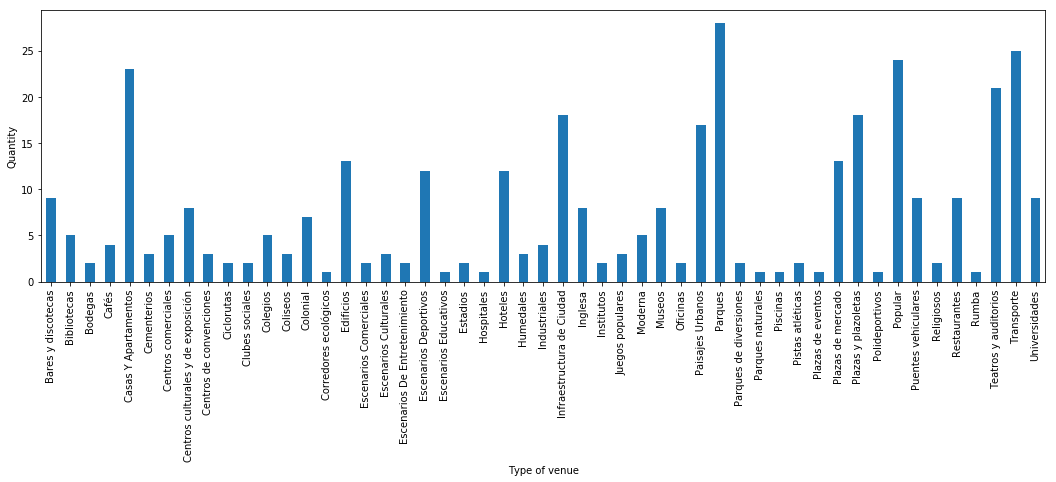

In [366]:
f, ax = plt.subplots(figsize=(18,5))
c.groupby('Type of venue')['Venue Name'].nunique().plot(kind='bar')
plt.ylabel('Quantity')
plt.show()

### Now, let's look for all venues related to restaurants, bars, coffee ...

In [367]:
d=c[(c['Type of venue']=="Restaurantes") | (c['Type of venue']=="Cafés")| (c['Type of venue']=="Bares y discotecas")| (c['Type of venue']=="Rumba")] 

In [368]:
d

,Venue Name,Location Name,Neighborhood Name,Adress,Latitude,Longitude,Type of venue
0,A Seis Manos,Santa Fé,Las Nieves,Calle 22 No 8-60,4.608384,-74.071419,Restaurantes
5,Andrés DC,Chapinero,Chicó Lago,Centro Comercial El Retiro No. 12-21 Int.82,4.666542,-74.054365,Restaurantes
11,Apolos Men,Chapinero,La Cabrera,Calle 85 No. 11-18,4.668141,-74.051765,Bares y discotecas
13,Asilo Bar,Teusaquillo,Teusaquillo,Av. caracas No. 40 – 43,4.628580,-74.068536,Bares y discotecas
61,Boogaloop Club,Chapinero,Chapinero Central,Cra. 13 No 65-42,4.653014,-74.063235,Bares y discotecas
67,Café Pasaje,La Candelaria,La Candelaria,Cra. 6 No. 12C-25,4.600877,-74.073089,Cafés
68,Café Varietale Andes,La Candelaria,Las Aguas,Diagonal 20A No 0-06,4.603521,-74.065139,Cafés
69,Café Varietale Chapinero,Chapinero,Marly,Calle 41 No 8-43,4.628846,-74.066296,Cafés
83,Casa Santa Clara,Santa Fé,NaN,Cerro de Monserrate.,4.602637,-74.060878,Restaurantes
107,Cervecería Statua Rota,Teusaquillo,La Soledad,Calle 40 No 21-34,4.630383,-74.073725,Bares y discotecas


Text(0, 0.5, ' ')

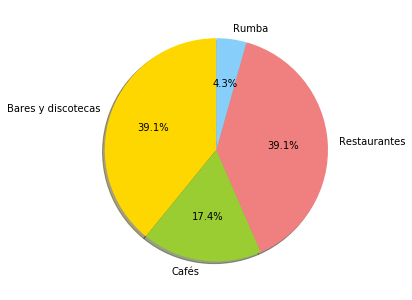

In [369]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
d.groupby('Type of venue')['Venue Name'].nunique().plot(kind='pie',figsize=(5, 6), 
                                                        autopct='%1.1f%%', startangle=90, 
                                                        shadow=True,              
                                                        colors=colors_list,  
                                                    
                                                       )
plt.ylabel(' ')
                           

# Segmenting and Clustering Neighbourhoods in Bogotá

### Getting the latitude and longitude of Bogota using geopy library

In [370]:
address = 'Bogota, BT'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bogotá are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bogotá are 4.6535606, -74.0541388.


In [371]:
Bogo_ta = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(d['Latitude'], d['Longitude'], d['Location Name'], d['Venue Name']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Bogo_ta)  
    
Bogo_ta

### Now we can see above the possible venues where the company could film

### But now, we are going to use the K-means clustering to know which places are closer to each other

In [450]:
bogota_data = d[(d['Location Name']=="Chapinero") | (d['Location Name']=="Teusaquillo")| (d['Location Name']=="La Candelaria")| (d['Location Name']=="Santa Fé")].reset_index(drop=True)
bogota_data

,Venue Name,Location Name,Neighborhood Name,Adress,Latitude,Longitude,Type of venue
0,A Seis Manos,Santa Fé,Las Nieves,Calle 22 No 8-60,4.608384,-74.071419,Restaurantes
1,Andrés DC,Chapinero,Chicó Lago,Centro Comercial El Retiro No. 12-21 Int.82,4.666542,-74.054365,Restaurantes
2,Apolos Men,Chapinero,La Cabrera,Calle 85 No. 11-18,4.668141,-74.051765,Bares y discotecas
3,Asilo Bar,Teusaquillo,Teusaquillo,Av. caracas No. 40 – 43,4.628580,-74.068536,Bares y discotecas
4,Boogaloop Club,Chapinero,Chapinero Central,Cra. 13 No 65-42,4.653014,-74.063235,Bares y discotecas
5,Café Pasaje,La Candelaria,La Candelaria,Cra. 6 No. 12C-25,4.600877,-74.073089,Cafés
6,Café Varietale Andes,La Candelaria,Las Aguas,Diagonal 20A No 0-06,4.603521,-74.065139,Cafés
7,Café Varietale Chapinero,Chapinero,Marly,Calle 41 No 8-43,4.628846,-74.066296,Cafés
8,Casa Santa Clara,Santa Fé,NaN,Cerro de Monserrate.,4.602637,-74.060878,Restaurantes
9,Cervecería Statua Rota,Teusaquillo,La Soledad,Calle 40 No 21-34,4.630383,-74.073725,Bares y discotecas


In [451]:
address = 'Chapinero, BT'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chapinero are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chapinero are 4.6535606, -74.0541388.


In [452]:
chapinero = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(bogota_data['Latitude'], bogota_data['Longitude'], bogota_data['Location Name'], bogota_data['Venue Name']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(chapinero)  
    
chapinero

In [453]:
CLIENT_ID = 'I4BBG5UENS5BYELIJVWM3NN0AELS24LXVP03OCZRKHK20YSX' # your Foursquare ID
CLIENT_SECRET = 'PC3VZR2GLX0OF0CFZ51DIDGP1NECVDQ1BMN354XFILYXFWXJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I4BBG5UENS5BYELIJVWM3NN0AELS24LXVP03OCZRKHK20YSX
CLIENT_SECRET:PC3VZR2GLX0OF0CFZ51DIDGP1NECVDQ1BMN354XFILYXFWXJ


In [455]:
bogota_data.loc[0, 'Location Name']

'Santa Fé'

In [456]:
neighborhood_latitude = bogota_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bogota_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = bogota_data.loc[0, 'Location Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Santa Fé are 4.6083843, -74.071419.


In [457]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [458]:
results = requests.get(url).json()

In [459]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [460]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,El Antioqueño,South American Restaurant,4.606883,-74.070747
1,Centro Cultural Teatro Municipal Jorge Eliécer...,Theater,4.608621,-74.070531
2,BBC La Bodega - Terraza Pasteur,Brewery,4.609755,-74.070150
3,Restaurante Florida,Restaurant,4.607428,-74.070900
4,Cevicheria Brisas del Caribe,Caribbean Restaurant,4.610548,-74.071149


In [461]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

36 venues were returned by Foursquare.


In [462]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [463]:
# type your answer here

chapi_venues = getNearbyVenues(names=bogota_data['Location Name'],
                                   latitudes=bogota_data['Latitude'],
                                   longitudes=bogota_data['Longitude']
                                  )

Santa Fé
Chapinero
Chapinero
Teusaquillo
Chapinero
La Candelaria
La Candelaria
Chapinero
Santa Fé
Teusaquillo
Santa Fé
La Candelaria
Santa Fé
Santa Fé
Chapinero
Santa Fé
La Candelaria
Santa Fé
Chapinero
Chapinero
Teusaquillo


In [471]:
print(chapi_venues.shape)
chapi_venues.head()

(1166, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Santa Fé,4.608384,-74.071419,El Antioqueño,4.606883,-74.070747,South American Restaurant
1,Santa Fé,4.608384,-74.071419,Centro Cultural Teatro Municipal Jorge Eliécer...,4.608621,-74.070531,Theater
2,Santa Fé,4.608384,-74.071419,BBC La Bodega - Terraza Pasteur,4.609755,-74.070150,Brewery
3,Santa Fé,4.608384,-74.071419,Restaurante Florida,4.607428,-74.070900,Restaurant
4,Santa Fé,4.608384,-74.071419,Cevicheria Brisas del Caribe,4.610548,-74.071149,Caribbean Restaurant


In [473]:
bogota_venues.groupby('Venue').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,Venue Category
Venue,,,,,,
14 Inkas,1,1,1,1,1,1
4:40 Music Hall,2,2,2,2,2,2
69 Gauchos,1,1,1,1,1,1
Abasto,2,2,2,2,2,2
Abbott & Costello,2,2,2,2,2,2
Adidas Outlet Store,1,1,1,1,1,1
Adidas Performance Store,2,2,2,2,2,2
Ali Baba & Los 40 Sabores,2,2,2,2,2,2
Alitas Colombianas,2,2,2,2,2,2


In [474]:
print('There are {} uniques categories.'.format(len(chapi_venues['Venue Category'].unique())))

There are 149 uniques categories.


In [477]:
# one hot encoding
chapi_onehot = pd.get_dummies(chapi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chapi_onehot['Neighborhood'] = chapi_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chapi_onehot.columns[-1]] + list(chapi_onehot.columns[:-1])
chapi_onehot = chapi_onehot[fixed_columns]

chapi_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Café,Candy Store,Caribbean Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cultural Center,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Drugstore,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hotel,Ice Cream Shop,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Nightlife Spot,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Plaza,Pool,Pub,Record Shop,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint,Women's Store
0,Santa Fé,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Santa Fé,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Santa Fé,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Santa Fé,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Santa Fé,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [478]:
chapi_onehot.shape

(1166, 150)

In [479]:
chapi_grouped = chapi_onehot.groupby('Neighborhood').mean().reset_index()
chapi_grouped

,Neighborhood,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Café,Candy Store,Caribbean Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cultural Center,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Drugstore,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hotel,Ice Cream Shop,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Nightlife Spot,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Plaza,Pool,Pub,Record Shop,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint,Women's Store
0,Chapinero,0.001828,0.007313,0.005484,0.009141,0.003656,0.000000,0.000000,0.003656,0.016453,0.010969,0.021938,0.038391,0.007313,0.003656,0.005484,0.003656,0.005484,0.001828,0.010969,0.000000,0.000,0.007313,0.012797,0.003656,0.000,0.025594,0.014625,0.049360,0.000000,0.005484,0.007313,0.016453,0.040219,0.003656,0.000000,0.001828,0.000000,0.001828,0.000000,0.000000,0.003656,0.000000,0.000000,0.000000,0.010969,0.000000,0.003656,0.000000,0.001828,0.000,0.029250,0.000,0.000000,0.001828,0.000000,0.003656,0.025594,0.009141,0.003656,0.014625,0.000,0.005484,0.001828,0.001828,0.000000,0.010969,0.003656,0.003656,0.001828,0.001828,0.000000,0.000000,0.003656,0.001828,0.000000,0.014625,0.014625,0.000000,0.003656,0.053016,0.012797,0.000000,0.007313,0.005484,0.021938,0.003656,0.005484,0.000000,0.005484,0.003656,0.021938,0.003656,0.001828,0.003656,0.001828,0.003656,0.000000,0.001828,0.007313,0.021938,0.001828,0.001828,0.001828,0.001828,0.000000,0.001828,0.001828,0.000,0.029250,0.000,0.000000,0.003656,0.000000,0.007313,0.003656,0.053016,0.001828,0.003656,0.000000,0.029250,0.007313,0.005484,0.009141,0.001828,0.000000,0.003656,0.003656,0.005484,0.000000,0.003656,0.007313,0.003656,0.007313,0.007313,0.000000,0.005484,0.009141,0.001828,0.001828,0.000000,0.007313,0.000000,0.012797,0.001828,0.003656,0.010969,0.003656,0.018282,0.003656
1,La Candelaria,0.000000,0.000000,0.000000,0.008929,0.013393,0.004464,0.017857,0.000000,0.008929,0.008929,0.017857,0.013393,0.000000,0.000000,0.000000,0.000000,0.000000,0.022321,0.000000,0.000000,0.000,0.013393,0.004464,0.000000,0.000,0.035714,0.004464,0.089286,0.004464,0.013393,0.000000,0.013393,0.040179,0.013393,0.004464,0.000000,0.004464,0.000000,0.004464,0.013393,0.013393,0.000000,0.004464,0.004464,0.004464,0.000000,0.000000,0.000000,0.000000,0.000,0.013393,0.000,0.000000,0.000000,0.000000,0.000000,0.022321,0.000000,0.013393,0.000000,0.000,0.000000,0.0000

In [480]:
chapi_grouped.shape

(4, 150)

In [481]:
num_top_venues = 5

for hood in chapi_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chapi_grouped[chapi_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Chapinero----
                venue  freq
0          Restaurant  0.05
1  Italian Restaurant  0.05
2                Café  0.05
3         Coffee Shop  0.04
4                 Bar  0.04


----La Candelaria----
                       venue  freq
0                 Restaurant  0.10
1                       Café  0.09
2  Latin American Restaurant  0.06
3             History Museum  0.06
4                Coffee Shop  0.04


----Santa Fé----
            venue  freq
0      Restaurant  0.11
1            Café  0.06
2    Burger Joint  0.05
3           Hotel  0.04
4  Sandwich Place  0.04


----Teusaquillo----
                  venue  freq
0            Restaurant  0.08
1                  Café  0.07
2  Fast Food Restaurant  0.05
3        Sandwich Place  0.04
4                Bakery  0.04




In [482]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [483]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chapi_grouped['Neighborhood']

for ind in np.arange(chapi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chapi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chapinero,Italian Restaurant,Restaurant,Café,Coffee Shop,Bar,Sandwich Place,Fast Food Restaurant,Pizza Place,Burger Joint,French Restaurant
1,La Candelaria,Restaurant,Café,Latin American Restaurant,History Museum,Coffee Shop,Burger Joint,Hotel,Plaza,Pub,Mexican Restaurant
2,Santa Fé,Restaurant,Café,Burger Joint,Sandwich Place,Hotel,Italian Restaurant,Theater,Fast Food Restaurant,South American Restaurant,Building
3,Teusaquillo,Restaurant,Café,Fast Food Restaurant,Bar,Bakery,Sandwich Place,Pizza Place,Burger Joint,Nightclub,Breakfast Spot


In [485]:
# set number of clusters
kclusters = 4

chapi_grouped_clustering = chapi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chapi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 1, 3], dtype=int32)

In [493]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'cluster labels', kmeans.labels_)

manhattan_merged = bogota_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Location Name')

manhattan_merged.head() # check the last columns!

,Venue Name,Location Name,Neighborhood Name,Adress,Latitude,Longitude,Type of venue,cluster labels,1Cluster Labels3,1Cluster Labels,Cluster Labels,Cluster Labels1,Cluster Labels 10,Cluster Labels 6,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A Seis Manos,Santa Fé,Las Nieves,Calle 22 No 8-60,4.608384,-74.071419,Restaurantes,1,1,1,1,1,1,1,Restaurant,Café,Burger Joint,Sandwich Place,Hotel,Italian Restaurant,Theater,Fast Food Restaurant,South American Restaurant,Building
1,Andrés DC,Chapinero,Chicó Lago,Centro Comercial El Retiro No. 12-21 Int.82,4.666542,-74.054365,Restaurantes,0,0,0,0,0,0,0,Italian Restaurant,Restaurant,Café,Coffee Shop,Bar,Sandwich Place,Fast Food Restaurant,Pizza Place,Burger Joint,French Restaurant
2,Apolos Men,Chapinero,La Cabrera,Calle 85 No. 11-18,4.668141,-74.051765,Bares y discotecas,0,0,0,0,0,0,0,Italian Restaurant,Restaurant,Café,Coffee Shop,Bar,Sandwich Place,Fast Food Restaurant,Pizza Place,Burger Joint,French Restaurant
3,Asilo Bar,Teusaquillo,Teusaquillo,Av. caracas No. 40 – 43,4.628580,-74.068536,Bares y discotecas,3,3,3,3,3,3,3,Restaurant,Café,Fast Food Restaurant,Bar,Bakery,Sandwich Place,Pizza Place,Burger Joint,Nightclub,Breakfast Spot
4,Boogaloop Club,Chapinero,Chapinero Central,Cra. 13 No 65-42,4.653014,-74.063235,Bares y discotecas,0,0,0,0,0,0,0,Italian Restaurant,Restaurant,Café,Coffee Shop,Bar,Sandwich Place,Fast Food Restaurant,Pizza Place,Burger Joint,French Restaurant


In [504]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Venue Name'], manhattan_merged['cluster labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters